<h2 style="font-family: 'Constantia'; font-size: 36px; color: #FFA500;"> 4 👩‍💻 Logistic Regression + Oversampling 👩‍💻
<p style="color:#FAC898; font-family: 'Constantia', cursive;"> 🧠 SMOTE +RandomOversampler + StratifiedKFold Cross Val + Hyperparameter Tuning 🧠 </p></h2>

<img src="https://media.tenor.com/IdQJwgoeSNwAAAAC/pokemon-what.gif" alt= "Question marks">

In [1]:
# Basic libraries
import pymysql
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno # great library for visualisating the distribution of nulls!
import statsmodels.api as sm

# Hypothesis Testing
import math
from scipy import stats
from scipy.stats import ttest_ind

# Machine Learning
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import GridSearchCV
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import classification_report
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.feature_selection import VarianceThreshold
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn .metrics import roc_curve, roc_auc_score
from sklearn.preprocessing import LabelEncoder

#Additional binary classification models
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

# Other
pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings("ignore")
import plotly.express as px
%matplotlib inline
import re
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [2]:
data=pd.read_csv('pokemon_cleaned.csv')
data.head()

,base_total,capture_rate,experience_growth,height_m,hp,percentage_male,weight_kg,generation,is_legendary,is_genderless
0,318,45,1059860,0.7,45,88.1,6.9,1,0,0
1,405,45,1059860,1.0,60,88.1,13.0,1,0,0
2,625,45,1059860,2.0,80,88.1,100.0,1,0,0
3,309,45,1059860,0.6,39,88.1,8.5,1,0,0
4,405,45,1059860,1.1,58,88.1,19.0,1,0,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   base_total         801 non-null    int64  
 1   capture_rate       801 non-null    int64  
 2   experience_growth  801 non-null    int64  
 3   height_m           801 non-null    float64
 4   hp                 801 non-null    int64  
 5   percentage_male    801 non-null    float64
 6   weight_kg          801 non-null    float64
 7   generation         801 non-null    int64  
 8   is_legendary       801 non-null    int64  
 9   is_genderless      801 non-null    int64  
dtypes: float64(3), int64(7)
memory usage: 62.7 KB


In [4]:
#Baseline Model After Scaling- Without Over or UnderSampling

In [5]:
data['is_legendary'].value_counts()

0    731
1     70
Name: is_legendary, dtype: int64

In [6]:
data['is_legendary']= data['is_legendary'].replace({0:'No', 1:'Yes'}) #renaming rows before training the model
data['is_legendary'].value_counts()

No     731
Yes     70
Name: is_legendary, dtype: int64

In [7]:
# Encoding the target variable - I initially renamed the 0 and 1s from is+legendary to "Yes" and "No" so it would be easier for me to interpret as I cleaned my data

In [8]:
label_encoder = LabelEncoder()
data['is_legendary'] = label_encoder.fit_transform(data['is_legendary'])

In [9]:
features = ['base_total', 'capture_rate', 'experience_growth', 'height_m', 'hp', 'percentage_male', 'weight_kg', 'generation', 'is_legendary', 'is_genderless']
X= data[features]
y= data['is_legendary']

scaler=StandardScaler() #MinMaxScaler
X_scaled=scaler.fit_transform(X)

In [10]:
#I chose Standard Scaler because it is less susceptible to outliers, which means the outliers I have left intact in this project has less influence on the scaling process.

In [11]:
X_train, X_test, y_train, y_test= train_test_split(X_scaled, y, test_size=0.3, random_state=42)
logisticregression=LogisticRegression()
logisticregression.fit(X_train, y_train)
predictions= logisticregression.predict(X_test)

In [12]:
print('\nAccuracy: {:.2f}\n'.format(accuracy_score(y_test,predictions)))


Accuracy: 1.00



In [13]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       216
           1       1.00      1.00      1.00        25

    accuracy                           1.00       241
   macro avg       1.00      1.00      1.00       241
weighted avg       1.00      1.00      1.00       241



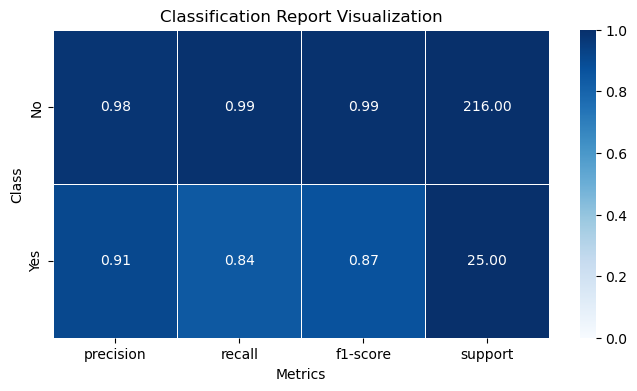

In [14]:
classification_data={"precision":[0.98, 0.91], "recall":[0.99,0.84], "f1-score":[0.99, 0.87], "support": [216, 25]}
classification_df= pd.DataFrame(classification_data, index=['No','Yes'])

plt.figure(figsize=(8,4))
sns.heatmap(classification_df, annot=True, cmap='Blues', fmt=".2f", vmin=0, vmax=1, linewidths= 0.5)
plt.title("Classification Report Visualization")
plt.xlabel("Metrics")
plt.ylabel("Class")
plt.show()

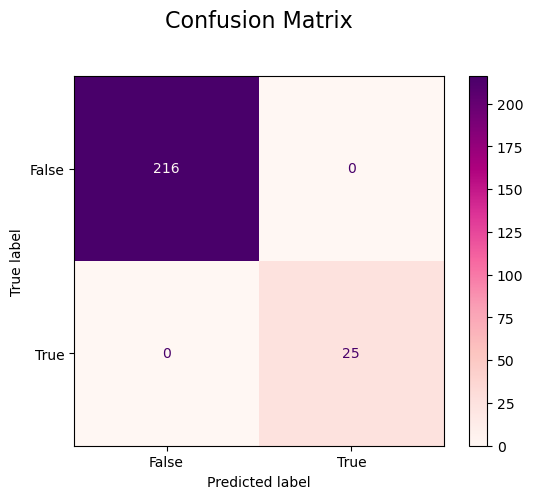

In [15]:
confusion_matrix = metrics.confusion_matrix(y_test, predictions)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot(cmap='RdPu', values_format='d')
plt.text(0.5, 1.15, 'Confusion Matrix', fontsize=16, ha='center', va='center', transform=plt.gca().transAxes)
plt.show()

In [16]:
#Is this a case of overfitting? Running a K Fold Cross Validation analysis should be able tell us if it really is the case of premature celebration

In [17]:

features = data.drop(columns=['is_legendary']) 
target = data['is_legendary']  

classifier = LogisticRegression()  # My chosen classifier

# Define the number of folds for cross-validation (k)
num_folds = 10  

# Create a k-fold cross-validation object
kf = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=42)

# Perform cross-validation and get the accuracy scores for each fold
accuracy_scores = cross_val_score(classifier, features, target, cv=kf, scoring='accuracy')

# Print the accuracy scores for each fold
for fold_num, accuracy in enumerate(accuracy_scores, start=1):
    print(f"Fold {fold_num}: Accuracy = {accuracy:.2f}")

# Calculate the mean accuracy across all folds
mean_accuracy = accuracy_scores.mean()

print('\nMean Accuracy: {:.2f}\n'.format(mean_accuracy))

Fold 1: Accuracy = 0.96
Fold 2: Accuracy = 0.94
Fold 3: Accuracy = 0.99
Fold 4: Accuracy = 0.99
Fold 5: Accuracy = 0.96
Fold 6: Accuracy = 0.97
Fold 7: Accuracy = 0.94
Fold 8: Accuracy = 0.96
Fold 9: Accuracy = 0.97
Fold 10: Accuracy = 0.96

Mean Accuracy: 0.97



In [18]:
# It isn't a case overfitting! But there is still room to improve the prediction, recall and f1 scores of 'Yes' predictions before moving on to other models

In [19]:
#Oversampling the minority class using Random Oversampler


In [20]:
ros= RandomOverSampler()
X_ros,y_ros= ros.fit_resample(X,y)

In [21]:
y_ros.value_counts()

0    731
1    731
Name: is_legendary, dtype: int64

In [22]:
classification = LogisticRegression() 

transformer = StandardScaler().fit(X_ros)
X = transformer.transform(X_ros)
X_train, X_test, y_train, y_test = train_test_split(X, y_ros, test_size=0.3, random_state=100)# Create an instance of the LogisticRegression class
classification.fit(X_train, y_train)
predictions = classification.predict(X_test)
accuracy= accuracy_score(y_test, predictions)

print("Accuracy after RandomOversampler:", accuracy)


Accuracy after RandomOversampler: 1.0


In [23]:
report = classification_report(y_test, predictions)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       220
           1       1.00      1.00      1.00       219

    accuracy                           1.00       439
   macro avg       1.00      1.00      1.00       439
weighted avg       1.00      1.00      1.00       439



In [24]:
# Define the number of folds for cross-validation (k)
num_folds = 10  # You can change this value as per your requirement

# Create a k-fold cross-validation object
kf = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=42)

# Perform cross-validation and get the accuracy scores for each fold
accuracy_scores = cross_val_score(classification, X_ros, y_ros, cv=kf, scoring='accuracy')

# Print the accuracy scores for each fold
for fold_num, accuracy in enumerate(accuracy_scores, start=1):
    print(f"Fold {fold_num}: Accuracy = {accuracy:.2f}")

# Calculate the mean accuracy across all folds
mean_accuracy = accuracy_scores.mean()

print('\nMean Accuracy: {:.2f}\n'.format(mean_accuracy))

Fold 1: Accuracy = 0.95
Fold 2: Accuracy = 0.92
Fold 3: Accuracy = 0.92
Fold 4: Accuracy = 0.90
Fold 5: Accuracy = 0.91
Fold 6: Accuracy = 0.93
Fold 7: Accuracy = 0.90
Fold 8: Accuracy = 0.95
Fold 9: Accuracy = 0.95
Fold 10: Accuracy = 0.90

Mean Accuracy: 0.92



In [ ]:
# Disparity in accuracy is an indication of overfitting, as StratifiedKFolds tests the model on multiple sets of unseen data. That means we should try SMOTE instead!!!!

In [25]:
#Oversampling the minority class using SMOTE

In [26]:
data= pd.read_csv('pokemon_cleaned.csv')
data.head()

,base_total,capture_rate,experience_growth,height_m,hp,percentage_male,weight_kg,generation,is_legendary,is_genderless
0,318,45,1059860,0.7,45,88.1,6.9,1,0,0
1,405,45,1059860,1.0,60,88.1,13.0,1,0,0
2,625,45,1059860,2.0,80,88.1,100.0,1,0,0
3,309,45,1059860,0.6,39,88.1,8.5,1,0,0
4,405,45,1059860,1.1,58,88.1,19.0,1,0,0


In [28]:
smote= SMOTE() 
features = ['base_total', 'capture_rate', 'experience_growth', 'height_m', 'hp', 'percentage_male', 'weight_kg', 'generation', 'is_legendary', 'is_genderless']
X= data[features]
y= data['is_legendary']
X_sm, y_sm= smote.fit_resample(X, y)
y_sm.value_counts()

0    731
1    731
Name: is_legendary, dtype: int64

In [29]:
X_train, X_test, y_train, y_test= train_test_split(X_sm, y_sm, test_size=0.3, random_state=42)
logisticregression_smote= LogisticRegression()
logisticregression_smote.fit(X_train, y_train)
y_pred=logisticregression_smote.predict(X_test)
accuracy= accuracy_score(y_test, y_pred)

In [30]:
print("Accuracy after SMOTE:", accuracy)

Accuracy after SMOTE: 0.9430523917995444


In [31]:
report=classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.95      0.94      0.94       222
           1       0.94      0.95      0.94       217

    accuracy                           0.94       439
   macro avg       0.94      0.94      0.94       439
weighted avg       0.94      0.94      0.94       439



In [32]:
# Define the number of folds for cross-validation (k)
num_folds = 10  # You can change this value as per your requirement

# Create a k-fold cross-validation object
kf = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=42)

# Perform cross-validation and get the accuracy scores for each fold
accuracy_scores = cross_val_score(logisticregression_smote, X_sm, y_sm, cv=kf, scoring='accuracy')

# Print the accuracy scores for each fold
for fold_num, accuracy in enumerate(accuracy_scores, start=1):
    print(f"Fold {fold_num}: Accuracy = {accuracy:.2f}")

# Calculate the mean accuracy across all folds
mean_accuracy = accuracy_scores.mean()

print('\nMean Accuracy: {:.2f}\n'.format(mean_accuracy))

Fold 1: Accuracy = 0.95
Fold 2: Accuracy = 0.96
Fold 3: Accuracy = 0.91
Fold 4: Accuracy = 0.95
Fold 5: Accuracy = 0.95
Fold 6: Accuracy = 0.97
Fold 7: Accuracy = 0.90
Fold 8: Accuracy = 0.93
Fold 9: Accuracy = 0.93
Fold 10: Accuracy = 0.96

Mean Accuracy: 0.94



In [34]:
#Hyperparameter Tuning -- Credits to Finn Qiao, code adapted from[here](https://towardsdatascience.com/logistic-regression-model-tuning-with-scikit-learn-part-1-425142e01af5)

In [35]:
logisticregression_smote = LogisticRegression() # define the hyperparameter grid
param_grid =  {'penalty' : ['l1', 'l2'], # lasso or ridge regularization?
    'C' : np.logspace(-4, 4, 20),
    'solver' : ['liblinear'],} # is suitable for small to medium datasets for binary classification

grid_search = GridSearchCV(logisticregression_smote, param_grid, cv=5) # create the GridSearchCv object  
grid_search.fit(X_train, y_train) # fit the above object to my training data
    
best_params= grid_search.best_params_ # what are the best hyperparameters that were found during the GridSearchCV process?
best_model= grid_search.best_estimator_ # define before fitting, because the best hyperparameters will be saved into this model and i will use this to evaluate the model 

y_pred = best_model.predict(X_test) # let's make predictions based on the hyperparameters we found
    
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred) # because the positive label parameter is set to one, but in actuality i've renamed it to 'Yes'
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
print(report)
    

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       222
           1       1.00      1.00      1.00       217

    accuracy                           1.00       439
   macro avg       1.00      1.00      1.00       439
weighted avg       1.00      1.00      1.00       439



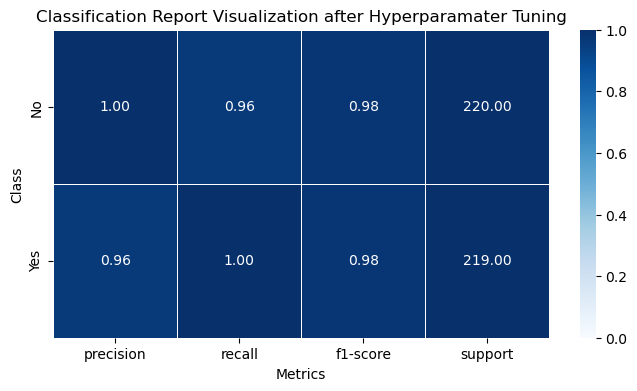

In [36]:
classification_data={"precision":[1.00, 0.96], "recall":[0.96,1.00], "f1-score":[0.98, 0.98], "support": [220, 219]}
classification_df= pd.DataFrame(classification_data, index=['No','Yes'])

plt.figure(figsize=(8,4))
sns.heatmap(classification_df, annot=True, cmap='Blues', fmt=".2f", vmin=0, vmax=1, linewidths= 0.5)
plt.title("Classification Report Visualization after Hyperparamater Tuning")
plt.xlabel("Metrics")
plt.ylabel("Class")
plt.show()

#AUC (Area Under Curve) Score - credits to Sarang Narkhede, code adapted from [here](https://towardsdatascience.com/understanding-auc-roc-curve-68b2303cc9c5)

In [ ]:
label_encoder = LabelEncoder() #because my target variable, is_legendary, is in string format...label encoder works well on columns with 2 categories
y_test_numeric = label_encoder.fit_transform(y_test)
y_pred_numeric = label_encoder.transform(y_pred)
auc = np.round(roc_auc_score(y_test_numeric, y_pred_numeric), 3)
print("Auc for the model after hyperparameter tuning is {}".format(auc))

In [ ]:
#Using StratifiedKFold once again to cross validate

In [ ]:
best_model = LogisticRegression()  # as defined above

# Define the number of folds for cross-validation (k)
num_folds = 10  # You can change this value as per your requirement

# Create a k-fold cross-validation object
kf = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=42)

# Perform cross-validation and get the accuracy scores for each fold
accuracy_scores = cross_val_score(best_model, features, target, cv=kf, scoring='accuracy')

# Print the accuracy scores for each fold
for fold_num, accuracy in enumerate(accuracy_scores, start=1):
    print(f"Fold {fold_num}: Accuracy = {accuracy:.2f}")

# Calculate the mean accuracy across all folds
mean_accuracy = accuracy_scores.mean()

print('\nMean Accuracy: {:.2f}\n'.format(mean_accuracy))

In [ ]:
# There is little evidence of overfitting as the model performs fairly well across all 10 folds :)